## Model statistical distribution
- The purpose is to visualize probability distribution function and cummulative probability distribution function of  continuous variable selected from data. Also, to sample values from the selected continuous variable distribution

### Import libraries

In [1]:
library(tidyverse)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Configure defaults

In [2]:
options(repr.plot.width = 11, repr.plot.height = 7) # set plot size

### Read data

- Data which contains store order details is stored as an excel file with total 21 columns namely
    - Row ID : Unique row identifier
    - Order ID : Unique order identifier
    - Order Date : Date of order
    - Ship Date : Shipping date of order
    - Ship Mode : Shipping mode namely `Second Class`, `Standard Class`, `First Class`, `Same Day`
    - Customer ID : Unique customer identifier
    - Customer Name : Name of customer
    - Segment : Customer segment namely `Consumer`, `Corporate`, `Home Office`
    - Country : Order shipping country namely `United States`
    - City : Order shipping city
    - State : Order shipping state
    - Postal Code : Order shipping postal code
    - Region : Order shipping region namely `South`, `West`, `Central`, `East`
    - Product ID : Unique product identifier
    - Category : Product category namely `Furniture`, `Office Supplies`, `Technology`
    - Sub-Category : Product sub-category namely `Bookcases`, `Chairs`, `Labels`,`Tables`, `Storage`, `Furnishings`, `Art`, `Phones`, `Binders`, `Appliances`, `Paper`, `Accessories`, `Envelopes`, `Fasteners`, `Supplies`, `Machines`, `Copiers`
    - Product Name : Name of product
    - Sales : Net amount paid by customers
    - Quantity : Order quantity
    - Discount : Discount customer got for the order
    - Profit : Profit from order

In [3]:
data <- read_xlsx('~/Downloads/data-models/Lecture 7 - Model statistical distribution/M2_Superstore.xlsx')
head(data, n = 5)

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L2236 / R2236C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L5276 / R5276C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L8800 / R8800C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9148 / R9148C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9149 / R9149C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9150 / R9150C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9388 / R9388C12: '05408'”

Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,⋯,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
<dbl>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,CA-2013-152156,2014-11-09,2014-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2014-11-09,2014-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,CA-2013-138688,2014-06-13,2014-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,⋯,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,US-2012-108966,2013-10-11,2013-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2013-10-11,2013-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


- The selected continuous variable is the total sales in a day. Reason behind choosing the the total sales per day is that if we understand pattern of daily sales, we can forcast sales for next day and adjust our sales strategy to fit the needs of store
- NOTE : the days that do not have any products sold were excluded from visualization

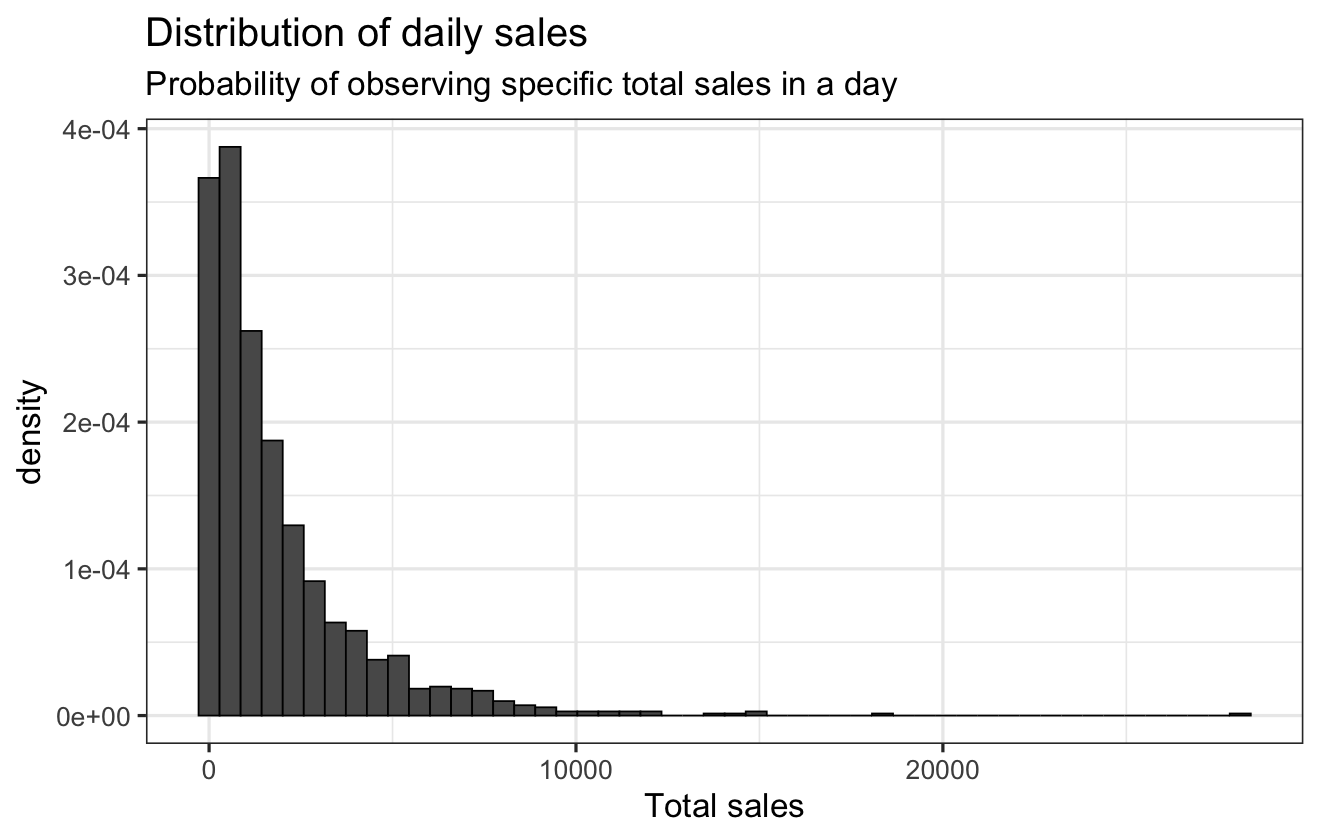

In [4]:
sum_day_sales <- data %>% 
group_by(`Order Date`)  %>%
summarise(`Total Sales` = sum(Sales))

ggplot(sum_day_sales) + 
geom_histogram(aes(x = `Total Sales`, y = ..density..), color = 'black', bins = 50) +
xlab('Total sales') +
ggtitle('Distribution of daily sales ', subtitle = 'Probability of observing specific total sales in a day') +
theme_bw(base_size = 20)

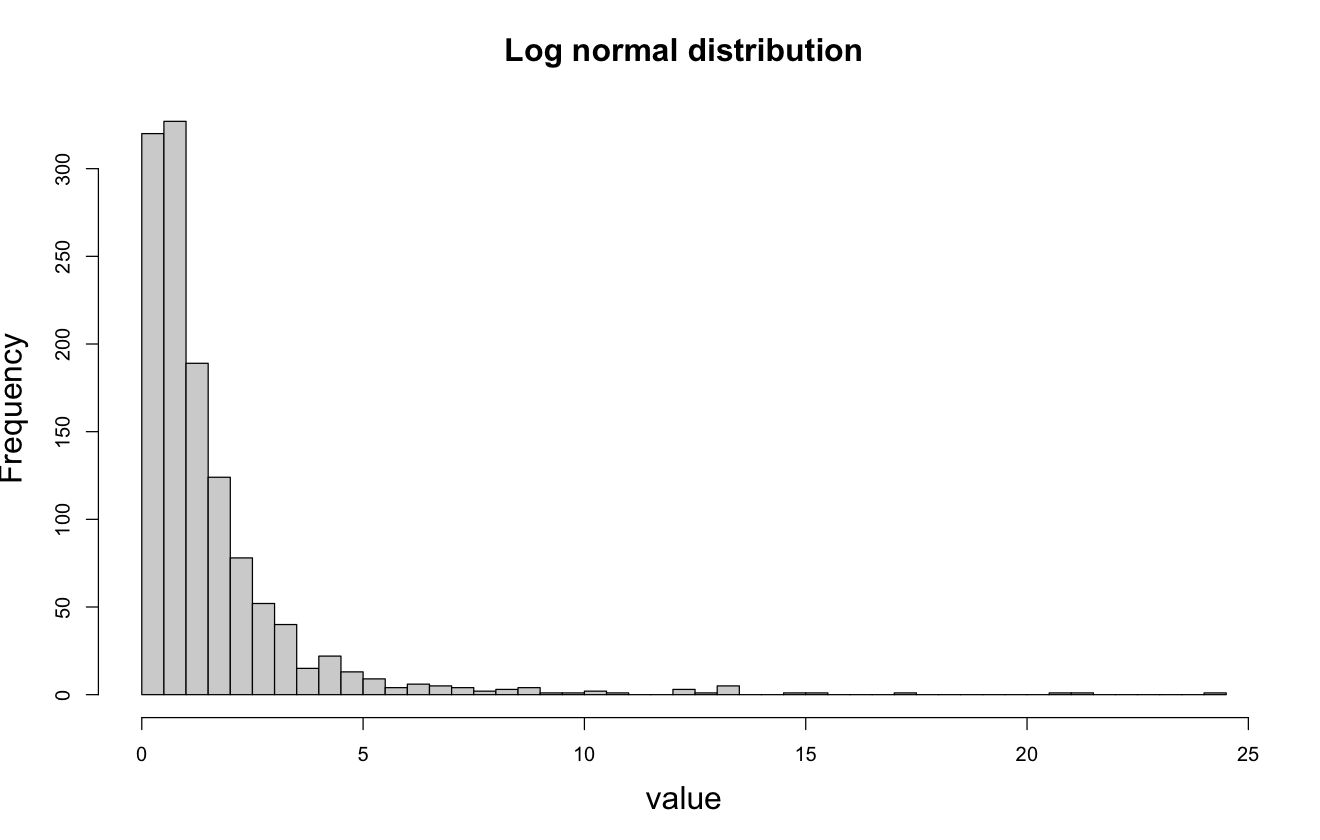

In [10]:
hist(rlnorm(1237), breaks = 50, main = 'Log normal distribution', cex.main = 1.6, xlab = 'value', cex.lab = 1.6)

**Observation**
- The distribution of daily sales follows log normal distribution. There were a few days that store total sales were high. However, the likeliness of low sales per day is greater and the store should beware of probable losses if the sales remain low for long time.

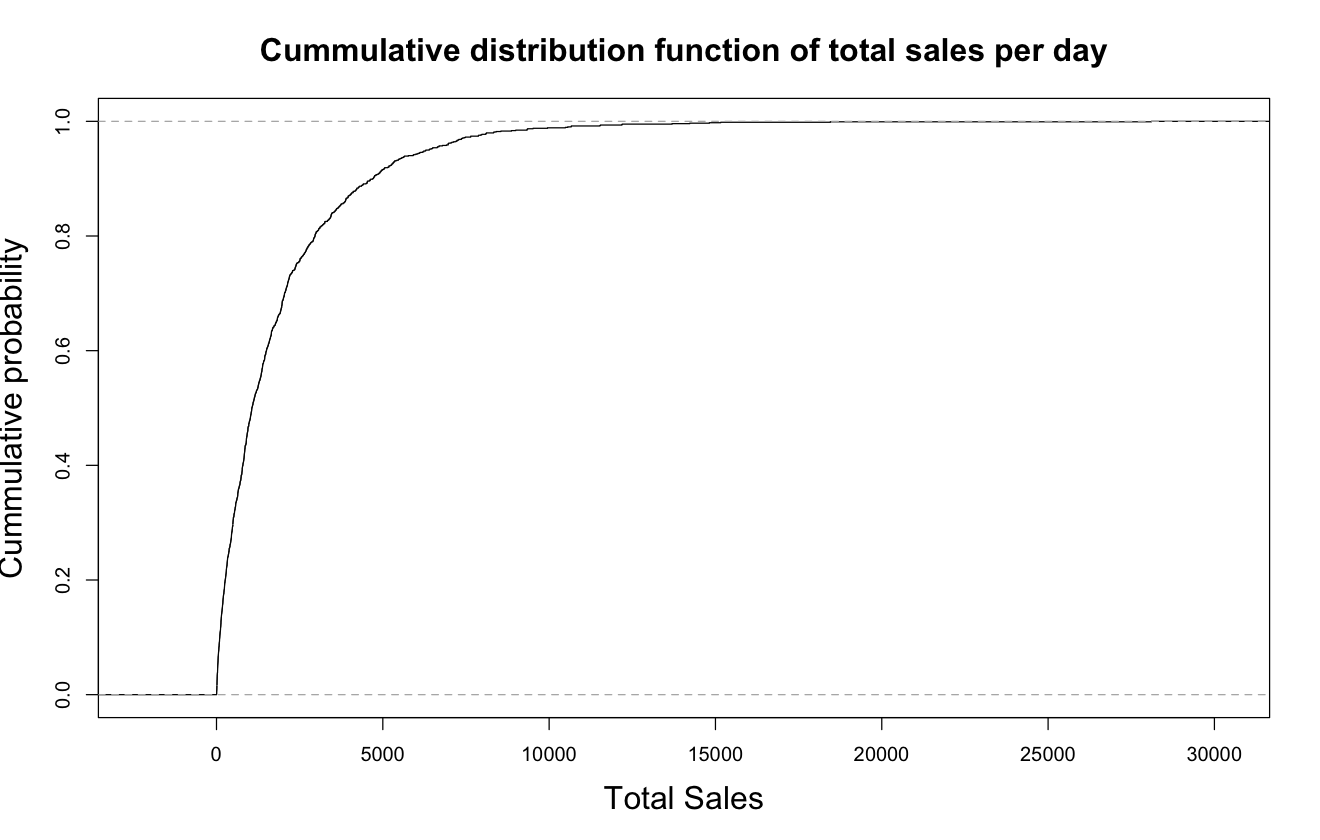

In [6]:
cdf <- ecdf(sum_day_sales$`Total Sales`)
plot(
    cdf, 
    main = 'Cummulative distribution function of total sales per day', 
    xlab = 'Total Sales',
    ylab = 'Cummulative probability',
    cex.main = 1.6, 
    cex.lab = 1.6
)

**Observation**
- From the cummulative probability distribution plot, there is around `40 percent` of chance that the store achieve per day sales of more than `~1.5 K` dollars. Rarely, the store's daily sales exceed a very high value of `10 K` dollars

In [7]:
quantile(sum_day_sales$`Total Sales`, runif(10)) # sample from total daily sales

46.88043% 91.58506% 35.80923% 80.93513% 65.46376% 39.84887%  36.6499% 42.59869% 
 968.6565 4980.9953  660.7436 3041.4659 1829.0115  784.8071  702.1682  850.3995 
37.62355% 57.48403% 
 734.1630 1389.7673

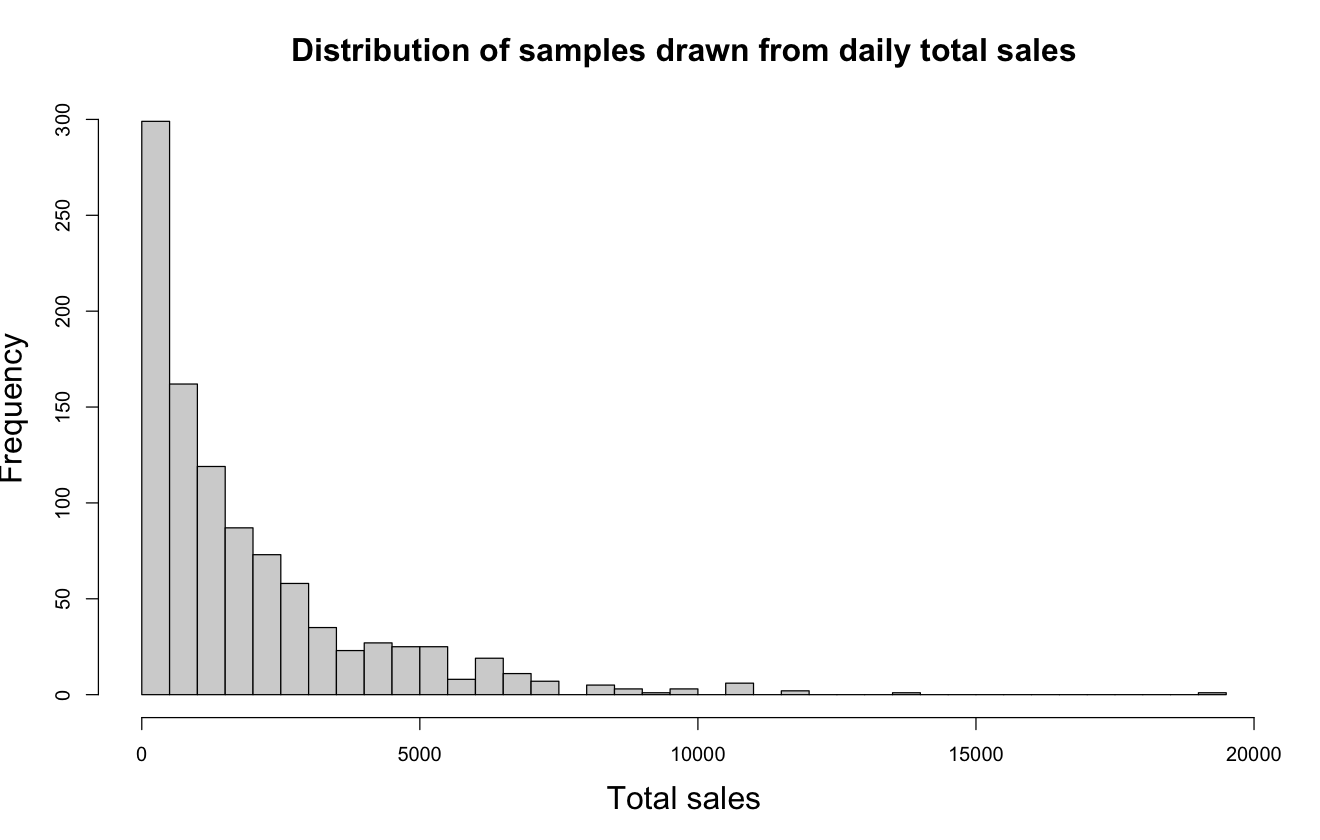

In [8]:
hist(
    quantile(sum_day_sales$`Total Sales`, runif(1000)),
    breaks = 50,
    cex.main = 1.6,
    cex.lab = 1.6,
    xlab = 'Total sales',
    main = 'Distribution of samples drawn from daily total sales'
)

**Observation**
- Because we randomly sample data there is sampling error which made the sample distribution looks nearly similar to as orginal total daily sales data